## LGM VIP Data Science

July 2022

Beginner Level Task 01 - Iris Flowers Classification ML Project

Name - Saba Saeed

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
# pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('iris.data')

In [3]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']

In [5]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  149 non-null    float64
 1   Sepal_width   149 non-null    float64
 2   Petal_length  149 non-null    float64
 3   Petal_width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.shape

(149, 5)

## Data Analysis

In [10]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


let's explore target variable

In [53]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

C:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


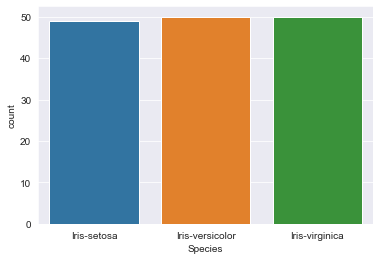

In [13]:
sns.countplot(df.Species, data = df)
plt.show()

### Numerical Columns

In [14]:
numerical_features= [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']

<AxesSubplot:xlabel='Sepal_length', ylabel='Count'>

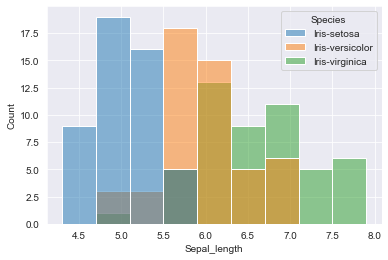

In [15]:
sns.histplot(x='Sepal_length', hue = 'Species' ,data=df)

<AxesSubplot:xlabel='Sepal_width', ylabel='Count'>

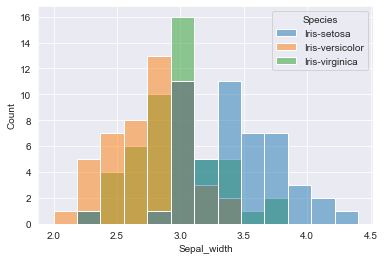

In [16]:
sns.histplot(x='Sepal_width', hue = 'Species' ,data=df)

<AxesSubplot:xlabel='Petal_length', ylabel='Count'>

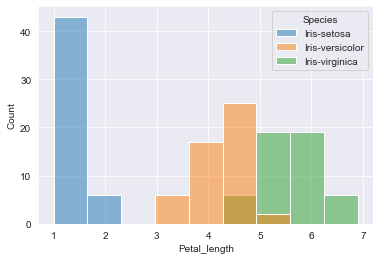

In [17]:
sns.histplot(x='Petal_length', hue = 'Species' ,data=df)

<AxesSubplot:xlabel='Petal_width', ylabel='Count'>

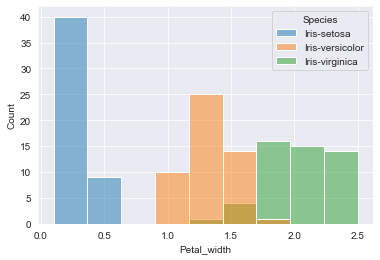

In [18]:
sns.histplot(x='Petal_width', hue = 'Species' ,data=df)

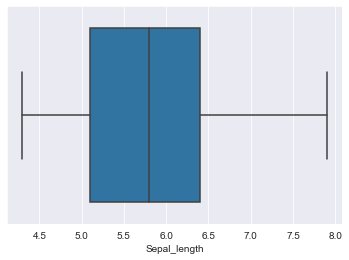

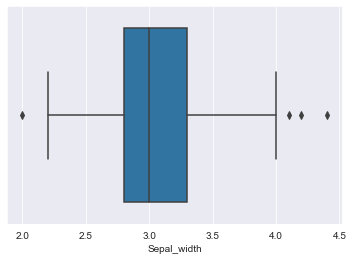

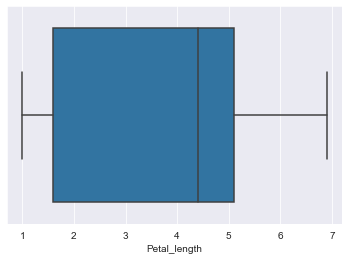

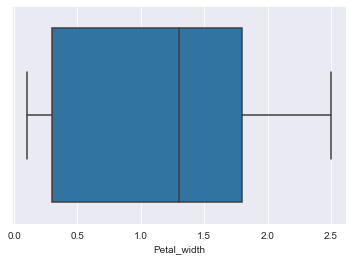

In [19]:
for feature in numerical_features:
    data= df.copy()
    sns.boxplot(x=data[feature], data = data)
    plt.show()

Sepal_width contains outliers

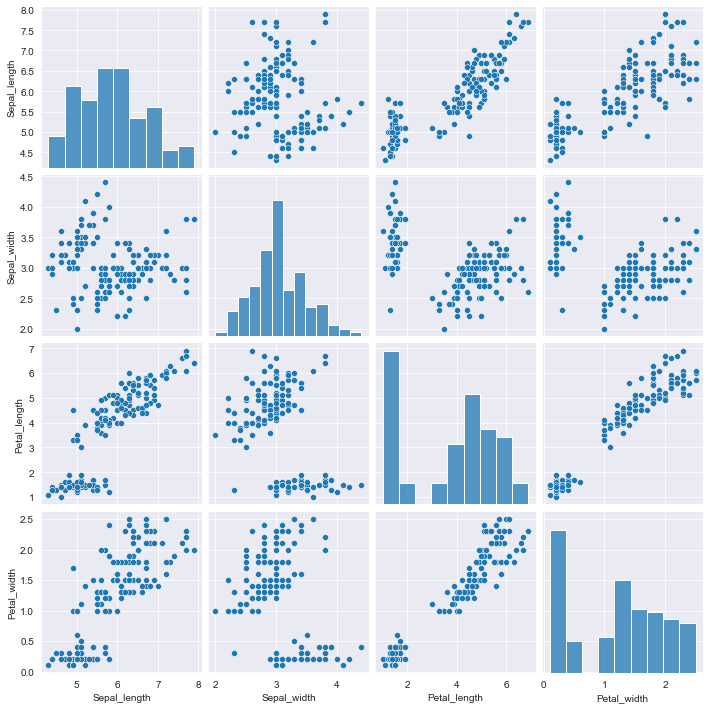

In [20]:
sns.pairplot(df)

## Feature Engineering

In [21]:
df[numerical_features].head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


## Train- Test Split

In [22]:
X = df.drop(['Species'], axis=1)
y = df['Species']

In [23]:
X.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [24]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [25]:
from sklearn.model_selection import train_test_split 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [27]:
X_train.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
39,5.0,3.5,1.3,0.3
53,6.5,2.8,4.6,1.5
148,5.9,3.0,5.1,1.8
10,4.8,3.4,1.6,0.2
50,6.4,3.2,4.5,1.5


In [28]:
X_test.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
127,6.4,2.8,5.6,2.1
120,5.6,2.8,4.9,2.0
82,6.0,2.7,5.1,1.6
42,5.0,3.5,1.6,0.6
107,6.7,2.5,5.8,1.8


In [29]:
y_test.head()

127     Iris-virginica
120     Iris-virginica
82     Iris-versicolor
42         Iris-setosa
107     Iris-virginica
Name: Species, dtype: object

In [30]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (119, 4)
X_test.shape: (30, 4)
y_train.shape: (119,)
y_test.shape: (30,)


## Feature Scaling

In [31]:
# data = df.copy()

In [32]:
# from sklearn.preprocessing import LabelEncoder

In [33]:
# encoder = LabelEncoder()

In [34]:
# data['Species'] = encoder.fit_transform(data['Species'])

In [35]:
# data.Species.unique()

In [36]:
# Y_train

In [37]:
X_train

,Sepal_length,Sepal_width,Petal_length,Petal_width
39,5.0,3.5,1.3,0.3
53,6.5,2.8,4.6,1.5
148,5.9,3.0,5.1,1.8
10,4.8,3.4,1.6,0.2
50,6.4,3.2,4.5,1.5
...,...,...,...,...
8,4.9,3.1,1.5,0.1
73,6.4,2.9,4.3,1.3
144,6.7,3.0,5.2,2.3
118,6.0,2.2,5.0,1.5


In [38]:
X_test

,Sepal_length,Sepal_width,Petal_length,Petal_width
127,6.4,2.8,5.6,2.1
120,5.6,2.8,4.9,2.0
82,6.0,2.7,5.1,1.6
42,5.0,3.5,1.6,0.6
107,6.7,2.5,5.8,1.8
56,4.9,2.4,3.3,1.0
1,4.7,3.2,1.3,0.2
69,5.9,3.2,4.8,1.8
25,5.0,3.4,1.6,0.4
141,5.8,2.7,5.1,1.9


In [39]:
y_train

39         Iris-setosa
53     Iris-versicolor
148     Iris-virginica
10         Iris-setosa
50     Iris-versicolor
            ...       
8          Iris-setosa
73     Iris-versicolor
144     Iris-virginica
118     Iris-virginica
99      Iris-virginica
Name: Species, Length: 119, dtype: object

In [40]:
y_test

127     Iris-virginica
120     Iris-virginica
82     Iris-versicolor
42         Iris-setosa
107     Iris-virginica
56     Iris-versicolor
1          Iris-setosa
69     Iris-versicolor
25         Iris-setosa
141     Iris-virginica
130     Iris-virginica
114     Iris-virginica
101     Iris-virginica
60     Iris-versicolor
26         Iris-setosa
23         Iris-setosa
122     Iris-virginica
102     Iris-virginica
21         Iris-setosa
12         Iris-setosa
70     Iris-versicolor
57     Iris-versicolor
48         Iris-setosa
71     Iris-versicolor
87     Iris-versicolor
117     Iris-virginica
145     Iris-virginica
88     Iris-versicolor
61     Iris-versicolor
63     Iris-versicolor
Name: Species, dtype: object

In [41]:
cols = X_train.columns

In [42]:
from sklearn.preprocessing import MinMaxScaler

encoder = MinMaxScaler()
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [43]:
X_train = pd.DataFrame(X_train, columns=cols)

In [44]:
X_test = pd.DataFrame(X_test, columns = cols)

In [45]:
X_train.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,0.181818,0.625000,0.018182,0.083333
1,0.636364,0.333333,0.618182,0.583333
2,0.454545,0.416667,0.709091,0.708333
3,0.121212,0.583333,0.072727,0.041667
4,0.606061,0.500000,0.600000,0.583333


In [46]:
X_test.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,0.583333,0.3750,0.779661,0.909091
1,0.361111,0.3750,0.661017,0.863636
2,0.472222,0.3125,0.694915,0.681818
3,0.194444,0.8125,0.101695,0.227273
4,0.666667,0.1875,0.813559,0.772727


In [47]:
X_train.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,119.000000,119.000000,119.000000,119.000000
mean,0.438757,0.448529,0.458671,0.450630
std,0.248600,0.183531,0.320941,0.321651
min,0.000000,0.000000,0.000000,0.000000
25%,0.212121,0.333333,0.054545,0.083333
50%,0.424242,0.416667,0.581818,0.500000
75%,0.621212,0.541667,0.709091,0.708333
max,1.000000,1.000000,1.000000,1.000000


### Model Trainning

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

### Predicting Result

In [51]:
y_pred_test =  model.predict(X_test)
y_pred_test

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

### Accuracy Score

In [52]:
from sklearn.metrics import accuracy_score

print('Training set score: {:.1f}'.format((model.score(X_train, y_train)*100)))
print('Test set score: {:.1f}'.format((model.score(X_test, y_test)*100)))

Training set score: 92.4
Test set score: 93.3
